# Quantization methods for Large Language Model
 - https://github.com/TimDettmers/bitsandbytes
 - The bitsandbytes is a lightweight wrapper around CUDA custom functions, in particular 8-bit optimizers, matrix multiplication (LLM.int8()), and quantization functions.

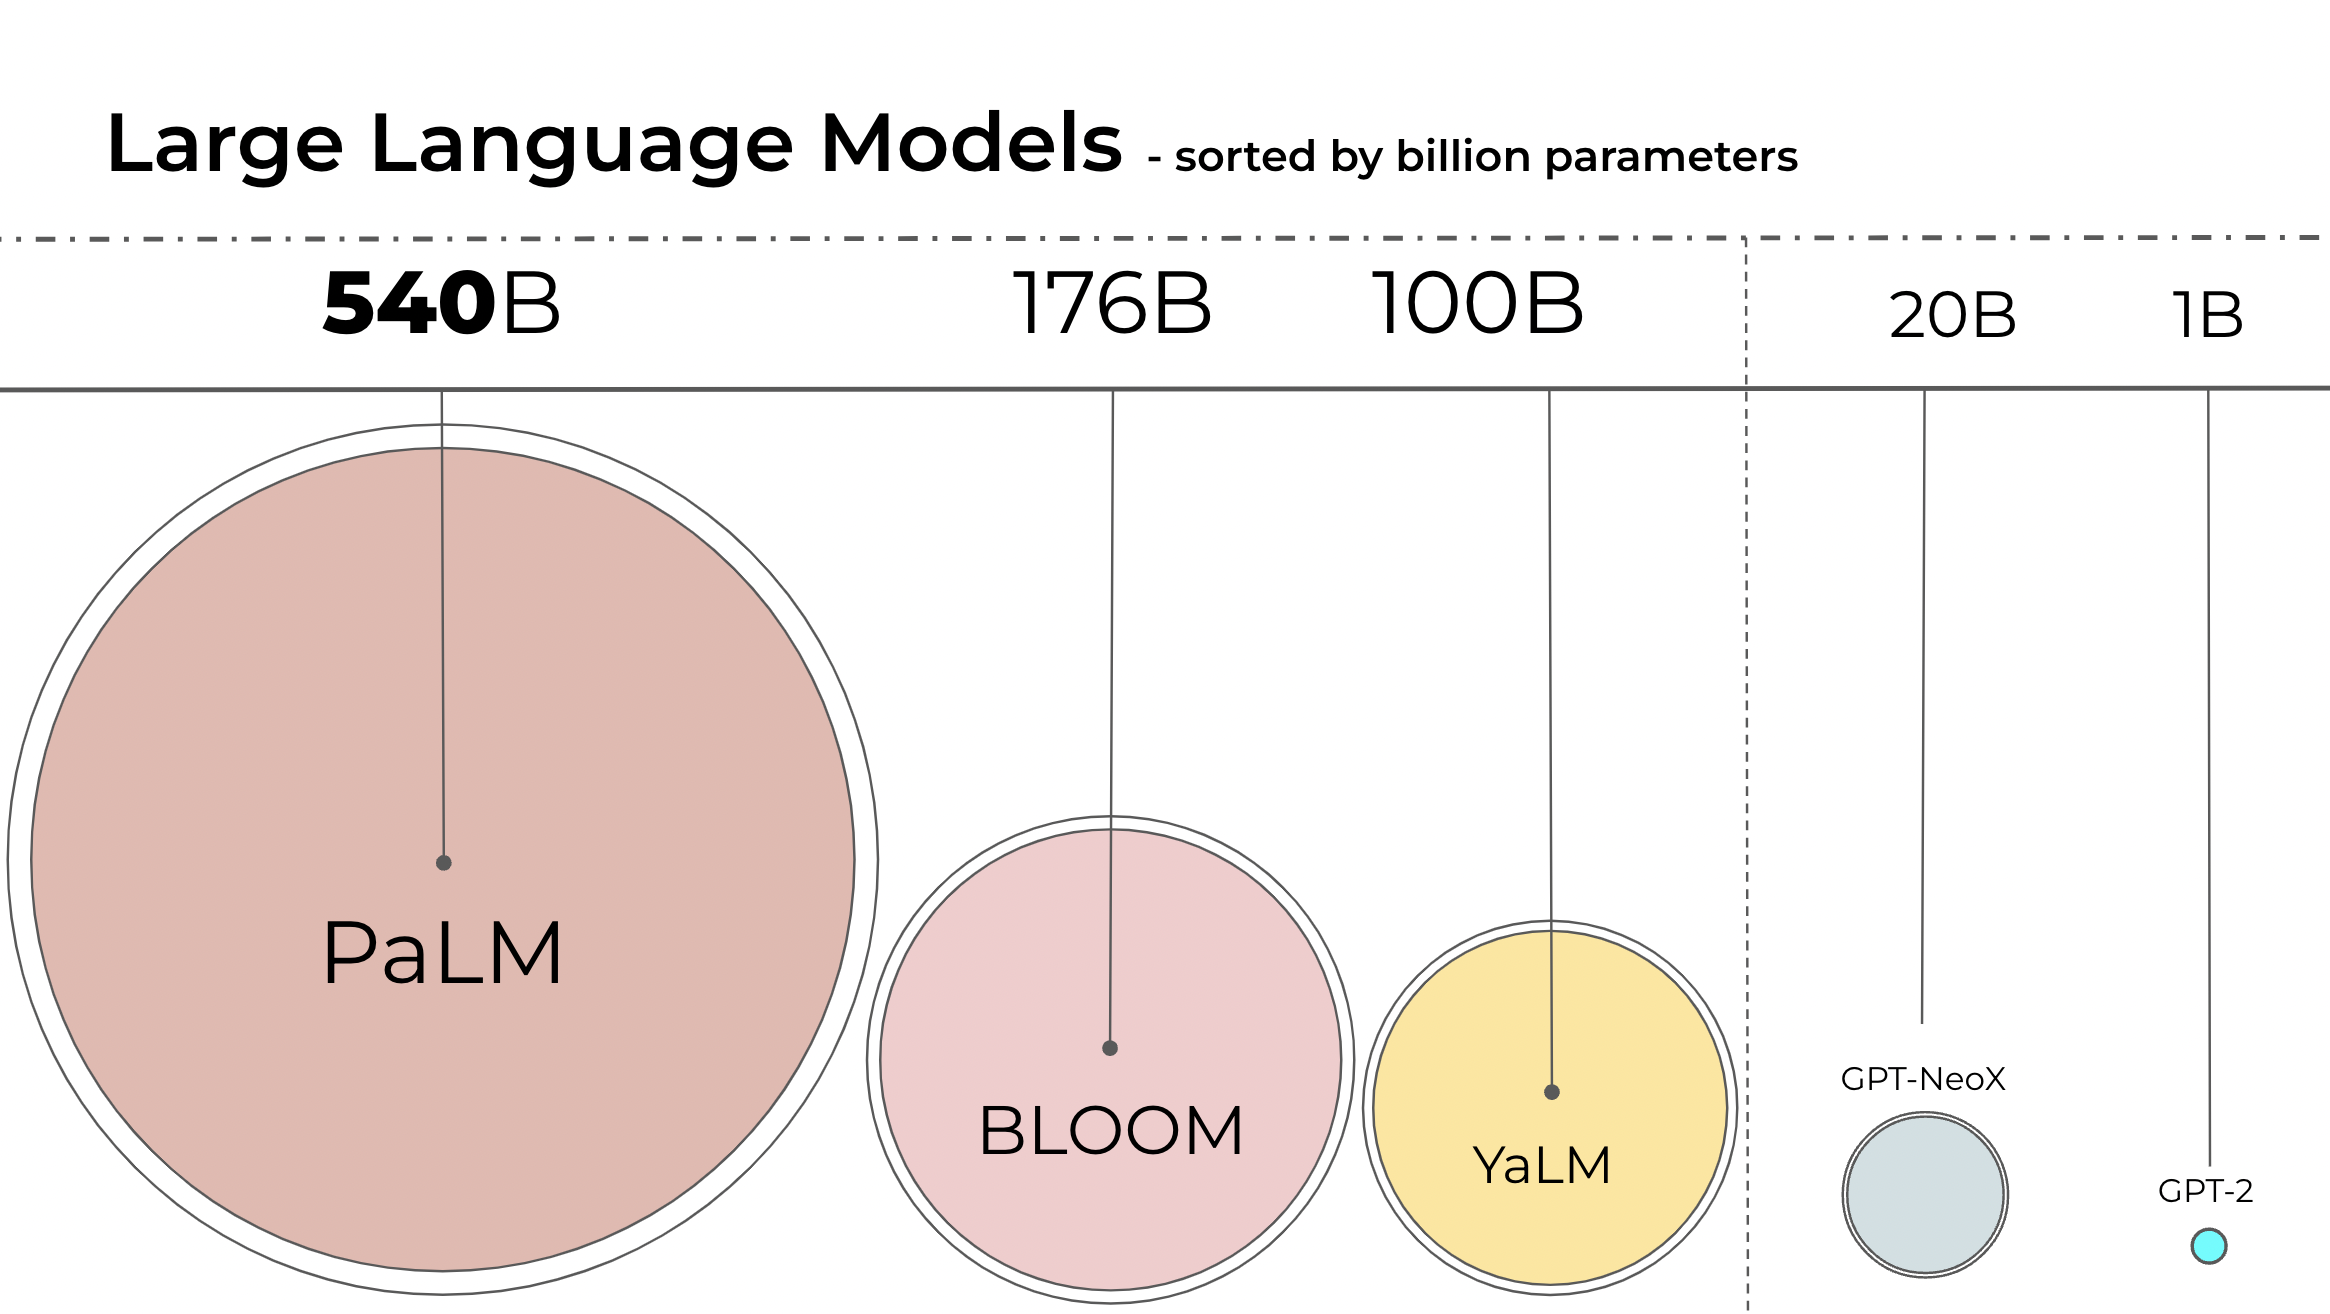

In [1]:
!pip install -U transformers bitsandbytes -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.5 MB/s eta 0:00:00


In [1]:
from transformers import AutoModelForCausalLM
import torch

In [2]:
model_name = "gpt2"
model = AutoModelForCausalLM.from_pretrained(
    model_name
)

In [ ]:
model.get_memory_footprint()/1000000000

## 00. Using both CPU and GPU in training

In [ ]:
device_map = {
    "transformer.word_embeddings": 0,
    "lm_head": "cpu",
    "transformer.h": 0,
    "transformer.ln_f": 0,
}

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map=device_map,
    llm_int8_enable_fp32_cpu_offload=True
)

## 01. 4bit, 8bit load

In [7]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    load_in_4bit=True
)

In [8]:
model.get_memory_footprint()/1000000000

0.134060568

In [9]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    load_in_8bit=True
)

In [10]:
model.get_memory_footprint()/1000000000

0.176527896

## 02. float 16 bit load
 - Basically parameters from torch model is float 32 bit
 - We can resize float 32 to 16 using torch_dtype option

In [19]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    #load_in_4bit=True,
    torch_dtype=torch.float16,
)

In [20]:
model.get_memory_footprint()/1000000000

0.134060568

In [16]:
model.save_pretrained("gpt2-fp16")

## 03. Quantization druing its computation
 - Even we applied quantization methods for pretrained model, still computation is using float32 during training. Thus, applying quantizations for its computation time is possible.

In [21]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.bfloat16,
)

 - the size of memory is same with and without it since bnb_4bit_compute option is working at its compuation time

In [22]:
model.get_memory_footprint()/1000000000

0.134060568

In [23]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    load_in_4bit=True,
    bnb_4bit_quant_type = "nf4"
)

In [24]:
model.get_memory_footprint()/1000000000

0.134060568

In [26]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    load_in_4bit=True,
    bnb_4bit_use_double_quant = True
)

 - double_quant applies double quantization

In [27]:
model.get_memory_footprint()/1000000000

0.134060568